In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tnfemesh.domain import Curve, Line2D, CircularArc2D, ParametricCurve2D

Line2D(start=(0, 0), end=(1, 1))
CircularArc2D(center=(0, 0), radius=1, start_angle=1.5707963267948966, angle_sweep=1.5707963267948966)
ParametricCurve2D(x_func=<function <lambda> at 0xffff7016c5e0>, y_func=<function <lambda> at 0xffff7016c790>)


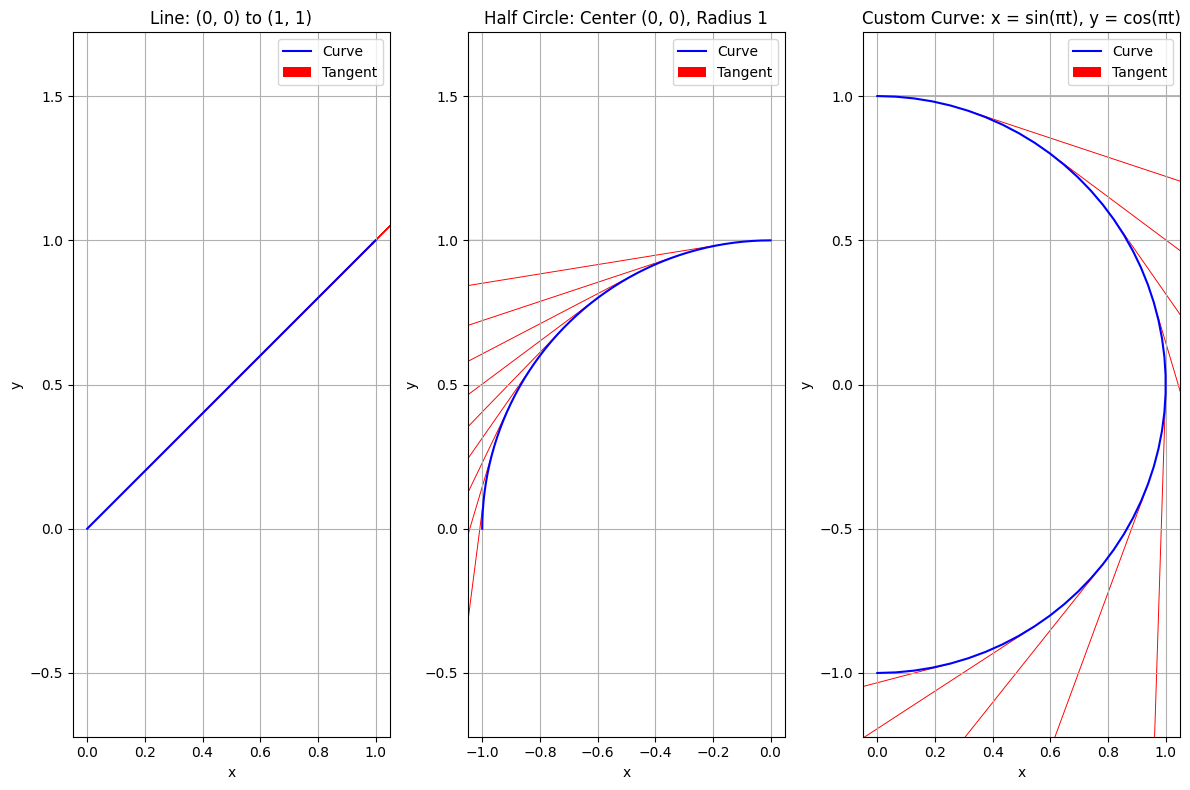

In [2]:
def plot_curve_with_tangents(curve, title, num_points=50):
    """
    Plot a curve and its tangent vectors on a 2D plane.

    Args:
        curve (Curve): An instance of a Curve object.
        title (str): Title of the plot.
        num_points (int): Number of points to sample along the curve.
    """
    # Sample points along the curve
    t_vals = np.linspace(0, 1, num_points)
    points = curve.evaluate(t_vals)
    tangents = curve.tangent(t_vals)

    # Plot the curve
    plt.plot(points[:, 0], points[:, 1], label="Curve", color="blue")

    # Plot tangent vectors
    for i in range(0, num_points, max(1, num_points // 10)):  # Fewer vectors for clarity
        p = points[i]
        t = tangents[i]
        plt.quiver(
            p[0], p[1], t[0], t[1],
            angles='xy', scale_units='xy', scale=1.0, color='red', width=0.003, label="Tangent" if i == 0 else ""
        )

    # Plot setup
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.legend()
    plt.grid()

# Create instances of different curves
line = Line2D((0, 0), (1, 1))
circular_arc = CircularArc2D((0, 0), 1, np.pi/2., 0.5*np.pi)
custom_curve = ParametricCurve2D(lambda t: np.sin(t * np.pi), lambda t: np.cos(t * np.pi))

print(line)
print(circular_arc)
print(custom_curve)

# Plot each curve
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plot_curve_with_tangents(line, "Line: (0, 0) to (1, 1)")

plt.subplot(1, 3, 2)
plot_curve_with_tangents(circular_arc, "Half Circle: Center (0, 0), Radius 1")

plt.subplot(1, 3, 3)
plot_curve_with_tangents(custom_curve, "Custom Curve: x = sin(πt), y = cos(πt)")

plt.tight_layout()
plt.show()


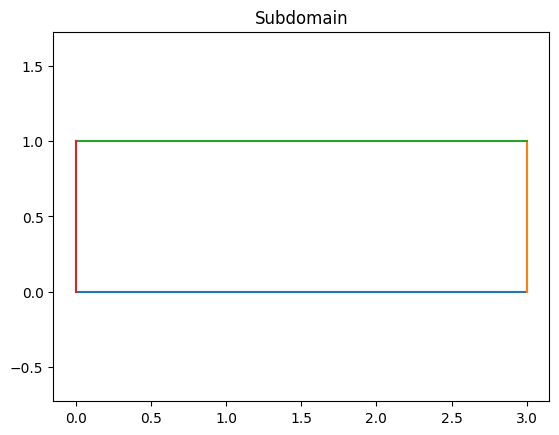

In [3]:
from tnfemesh.domain import RectangleFactory, QuadFactory

rectangle = RectangleFactory.create((0, 0), (3, 1))
rectangle.plot()

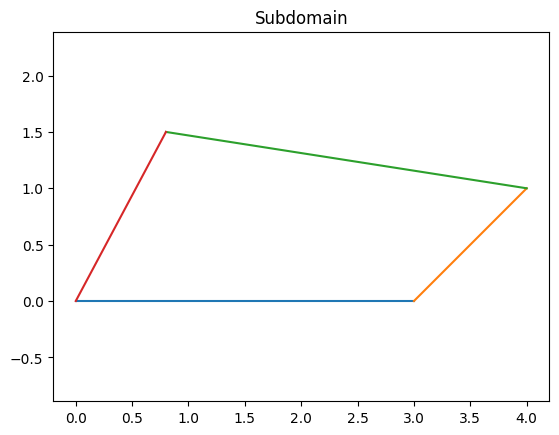

In [4]:
p1 = (0, 0)
p2 = (3, 0)
p3 = (4, 1)
p4 = (0.8, 1.5)

quad = QuadFactory.create(p1, p2, p3, p4)
quad.plot()

In [5]:
print(quad)
print(rectangle)

Subdomain2D(type=quadrilateral, num_curves=4)
Subdomain2D(type=quadrilateral, num_curves=4)
